In [4]:
%load_ext autoreload
%autoreload 2

import utilities
from evaluator import Evaluator
from embedder import Embedder
from embedder import Transformer
from embedder import Preprocessing_scaler
from Graph_generator import Graph_Generator
from visualizator import Visualizator

from eden import graph
import umap 

import numpy as np
from sklearn.decomposition import TruncatedSVD

import matplotlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
n_graphs = 800

# 20 permutations
gg = Graph_Generator(n_graphs=n_graphs,degree = 4)

g1, na1, ea1 = gg.generate(22,30,30,1)
g2, na2, ea2 = gg.generate(22,30,30,10)

graphs, labels = gg.generate_set(g1,g2,na1, ea1,na2, ea2,30,30,plot=False)


# ldp
functions = [utilities.degree,utilities.clust_coefficient,utilities.local_degree_profile]
# no ldp
#functions = [utilities.degree,utilities.clust_coefficient]

graphs = utilities.add_info_to_nodes(graphs,functions)


max_n_nodes, n_attributes = utilities.find_shapes(graphs)
n_classes = len(np.unique(labels))


graphs = tmp_preprocessing_vectorize(graphs)
print("done")

done


In [6]:
vetcoriz = graph.Vectorizer(complexity = 5)
m_1= Transformer(vetcoriz, has_fit = False)
pca = TruncatedSVD(n_components=1000)
m_2 = Transformer(pca)
uma = umap.UMAP()
m_3 = Transformer(uma)

emb_5 = Embedder([m_1,m_2,m_3], name="Vectorize-5, PCA-1000, UMAP")

In [7]:
emb = [emb_5]
vis_800 = utilities.repeat_n_times(graphs, labels, emb , [2], 1,test_size=0.3,seed = 11)

	 iteration n: 1
	 	 dim:  2
	 	 	  Vectorize-5, PCA-1000, UMAP


In [8]:
vis_800.summary()

                                 2    STD    mean
---------------------------  -----  -----  ------
Vectorize-5, PCA-1000, UMAP  0.684  0.072   0.378


# Vectorize PCA Auto_1 UMAP

In [9]:
from sklearn.model_selection import train_test_split
graphs_train, graphs_test, labels_train, labels_test = train_test_split(graphs,labels,test_size=0.3,random_state=11) 

In [10]:
vetcoriz = graph.Vectorizer(complexity = 5)
res_vec = vetcoriz.transform(graphs_train)

size_pca = len(graphs_train)
print(size_pca)

560


In [12]:
pca = TruncatedSVD(n_components=size_pca)
res_pca =pca.fit(res_vec).transform(res_vec)

In [14]:
import matplotlib.pyplot as plt

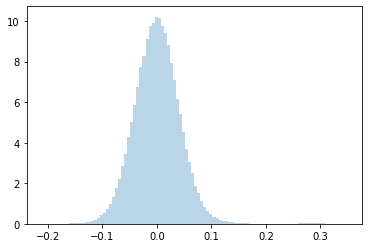

In [15]:
tmp = []

for a in res_pca:
    for b in a:
        tmp.append(b)
        
plt.hist(tmp,alpha=0.3,bins=100, density=True)
plt.show()

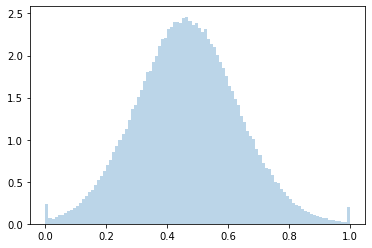

In [16]:
from embedder import Preprocessing_scaler
scaler = Preprocessing_scaler([0, 1])
res_pca = scaler.fit(res_pca).transform(res_pca)

tmp = []

for a in res_pca:
    for b in a:
        tmp.append(b)
        
plt.hist(tmp,alpha=0.3,bins=100, density=True)
plt.show()

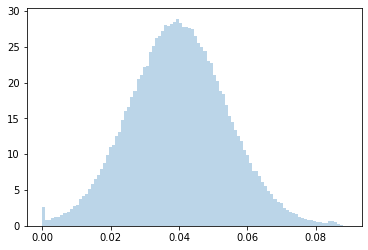

In [17]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(copy=True, norm='l2').fit(res_pca)  # fit does nothing.
res_pca = normalizer.transform(res_pca)


tmp = []

for a in res_pca:
    for b in a:
        tmp.append(b)
        
plt.hist(tmp,alpha=0.3, density=True,bins=100)
plt.show()


In [18]:
from keras import Input
from keras.layers import Dense
from keras import Model
from keras.initializers import RandomNormal
from keras.losses import mean_squared_error
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping, TensorBoard
count = 1


from keras.layers import Dropout

In [20]:
iniz = RandomNormal(mean=0, stddev=0.05)

rate_drop = 0.8

x_in = Input(shape=(size_pca,))
enc = Dropout(rate = 0.5)(x_in)
enc = Dense(size_pca * 2, activation="relu",kernel_initializer=iniz)(enc)
enc = Dropout(rate = rate_drop)(enc)
enc = Dense(size_pca, activation="relu",kernel_initializer=iniz)(enc)
enc = Dropout(rate = 0.5)(enc)
#enc = Dense(int(size_pca/2), activation="relu",kernel_initializer=iniz)(enc)
enc = Dense(60, activation="sigmoid",kernel_initializer=iniz)(enc)
#enc = Dropout(prob_drop)(enc)
#dec = Dense(int(size_pca/2), activation="relu",kernel_initializer=iniz)(enc)
dec = Dense(size_pca, activation="relu",kernel_initializer=iniz)(enc)

autoencoder = Model(x_in, dec)
autoencoder.compile(optimizer=RMSprop(), loss=mean_squared_error)

In [21]:
path = "logs_new_model_/auto_" + str(count)
count = count + 1 
tb = TensorBoard(log_dir=path)


In [22]:
# epoche sensate 3000 relu - sigm - relu - relu
# epoche sensate  600 relu - sigm - relu - sigm
autoencoder.fit(res_pca,res_pca,
                epochs=500,
                verbose = 0,
                batch_size = 32,
                validation_split = 0.2,
                callbacks=[tb])

print(autoencoder.evaluate(res_pca,res_pca))

Instructions for updating:
Use tf.cast instead.
560/560 [==============================] - 0s 80us/step
0.00019492553505447827


In [23]:
predicted_auto = autoencoder.predict(res_pca)

In [24]:
a = predicted_auto[1][0:10]
b = res_pca[1][0:10]
d = np.abs(a-b)
c = np.abs(predicted_auto[1]-res_pca[1])
for i in d:
    print(i)
    
print("\n"+str(np.mean(c)))

0.008219488524997862
0.014233744472813586
0.011626960475578766
0.00485172794472833
0.011641450130938563
0.013969049347599509
0.011790029012062532
0.026104506114315654
0.0017620758011732407
0.0028286435484386613

0.011102509195109755


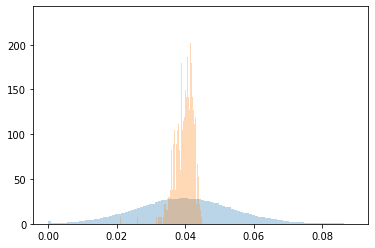

In [26]:
tmp = []

for a in res_pca:
    for b in a:
        tmp.append(b)
        
tmp_2 = []
for a in predicted_auto:
    for b in a:
        tmp_2.append(b)
        
        
plt.hist(tmp,alpha=0.3,bins=100, density=True)

plt.hist(tmp_2,alpha=0.3, bins=100, density=True)
plt.show()

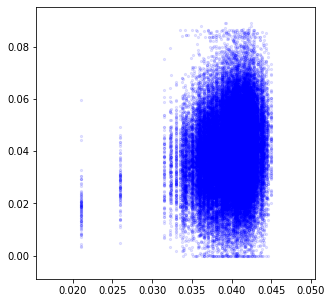

In [27]:

plt.figure(figsize=(5,5))
for i in range(0,100):
    a = predicted_auto[i]
    b = res_pca[i]
    plt.scatter(a,b,s=5,c='b',alpha=0.1)
#plt.plot(np.arange(0,2),c='r')
plt.show()

In [28]:
encoder = Model(x_in, enc)
res_auto = encoder.predict(res_pca)

In [29]:
uma = umap.UMAP(n_components=2)
uma = uma.fit(res_auto,labels_train)

# TEST su TEST SET

In [30]:
gr = graphs_test
lb = labels_test

In [31]:
test_vect = vetcoriz.transform(gr)
test_pca = pca.transform(test_vect)
test_pca = scaler.transform(test_pca)
test_pca = normalizer.transform(test_pca)
test_auto = encoder.predict(test_pca)
test_uma = uma.transform(test_auto)

K.N.N.  accuracy:  0.49253623188405793
D.tree. accuracy:  0.4428260869565217


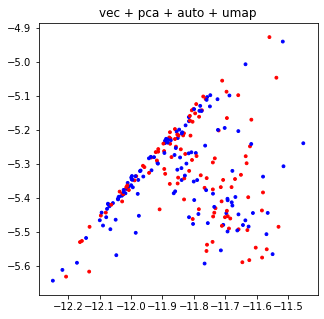

In [32]:
eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = eva.performance_with_kfold(test_uma,lb)
print("K.N.N.  accuracy: ",np.mean(acc))

eva = Evaluator(DecisionTreeClassifier())
acc, pre, rec, f = eva.performance_with_kfold(test_uma,lb)
print("D.tree. accuracy: ",np.mean(acc))


colors = ['red','blue']
plt.figure(figsize=(5,5))
lab = labels[1:500]
x = test_uma[:,0]
y = test_uma[:,1]
plt.title("vec + pca + auto + umap")
plt.scatter(x,y,s=8,c=lb,cmap=matplotlib.colors.ListedColormap(colors))

In [33]:
gr = graphs_test
lb = labels_test

K.N.N.  accuracy:  0.6842391304347826


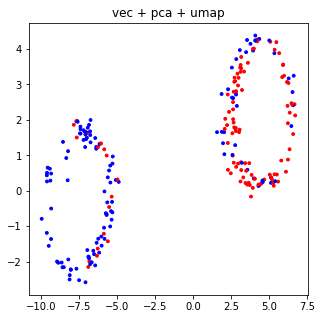

In [34]:
vect_res = emb_5.transform(gr)
eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = eva.performance_with_kfold(vect_res,lb)
print("K.N.N.  accuracy: ",np.mean(acc))
colors = ['red','blue']
plt.figure(figsize=(5,5))
lab = labels[1:500]
x = vect_res[:,0]
y = vect_res[:,1]
plt.title("vec + pca + umap")
plt.scatter(x,y,s=8,c=lb,cmap=matplotlib.colors.ListedColormap(colors))

In [35]:
def plot_autoencoder_results(original,res):
    a =range(len(res[0]))
    plt.figure(figsize=(10,5))

    #plot 2
    plt.subplot(121)
    for i in range(0,len(res[0])):
        r = res[i]
        o = original[i]
        plt.scatter(a,o-r,s=3, c='b')

    plt.title("Input - Output")



    # plot 3
    diff = original - res
    minim = np.min(diff)
    diff = diff + np.abs(minim)
    res = np.zeros(len(diff[0]))
    for i in diff:
        res = res + i
    res = res / len(diff)

    plt.subplot(122)
    plt.scatter(a,res, s=5, c = 'b' )
    plt.plot(np.zeros(len(a)),c='r')
    plt.title("Average of the error for each feature")


    plt.show()


In [36]:



def tmp_preprocessing_vectorize(graphs):        

    for g in graphs:
        
        c=0
        for n in g.nodes():
            a = g.nodes[n]['vec']
            del g.nodes[n]['vec']
            g.nodes[n]['label'] = str(a[0])
            g.nodes[n]['vec'] = a
            c=c+1

    for g in graphs:
        c=0
        for n in g.edges():
            a = g.edges[n]['vec']
            del g.edges[n]['vec']      
            g.edges[n]['label'] = str(a[0])
            g.edges[n]['vec'] = a[0]
            c=c+1

    return(graphs)


# RETE mix

In [191]:
from sklearn.model_selection import train_test_split
graphs_train, graphs_test, labels_train, labels_test = train_test_split(graphs,labels,test_size=0.3,random_state=10) 

vetcoriz = graph.Vectorizer(complexity = 5)
res_vec = vetcoriz.transform(graphs_train)

size_pca = len(graphs_train)

pca = TruncatedSVD(n_components=size_pca)
res_pca =pca.fit(res_vec).transform(res_vec)


from embedder import Preprocessing_scaler
scaler = Preprocessing_scaler([0, 1])
res_pca = scaler.fit(res_pca).transform(res_pca)


from sklearn.preprocessing import Normalizer
normalizer = Normalizer(copy=True, norm='l2').fit(res_pca)  # fit does nothing.
res_pca = normalizer.transform(res_pca)


In [192]:
count = 1

In [193]:
from keras.utils import plot_model
from keras import regularizers

In [194]:

iniz = RandomNormal(mean=0, stddev=0.05)

prob_drop = 0.5

x_in = Input(shape=(size_pca,))
enc = Dense(size_pca*2, activation="relu",kernel_initializer=iniz)(x_in)
enc = Dropout(prob_drop)(enc)
enc = Dense(size_pca, activation="relu",kernel_initializer=iniz)(enc)
enc = Dense(60, activation="sigmoid",kernel_initializer=iniz)(enc)

decode = Dense(size_pca, activation="relu",name='decoder',kernel_initializer=iniz)(enc)

cla = Dense(10, activation='relu',name='cla_10')(enc)
cla = Dense(2, activation='softmax',name='classifier')(cla)


autoencoder = Model(inputs = x_in, outputs = [decode,cla])

autoencoder.compile(optimizer='adam',
                    metrics={'decoder': 'mse', 'classifier': ['acc']},
                    loss = {'decoder': 'mean_squared_error', 'classifier': 'categorical_crossentropy'},
                    loss_weights = {'decoder': 0.1, 'classifier': 0.0001})

count = count + 1 


#for a in autoencoder.layers:
 #   print(a.name,a.trainable)

In [195]:
path = "logs_new_model_/auto__mix_"+str(count) 
tb = TensorBoard(log_dir=path)
count = count + 1 
autoencoder.fit(res_pca,{'decoder': res_pca, 'classifier': utilities.from_np_to_one_hot(labels_train)},
                epochs=100,    
                verbose=0,
                validation_split=0.2,
                callbacks=[tb])


In [196]:
a = autoencoder.evaluate(res_pca,[res_pca,utilities.from_np_to_one_hot(labels_train)])
n = autoencoder.metrics_names

for i in range(0,len(a)):
    print(str(n[i])+" "+str(a[i]))

560/560 [==============================] - 0s 115us/step
loss 0.00012720720884057561
decoder_loss 0.0011590019932815007
classifier_loss 0.11307009731286338
decoder_mean_squared_error 0.0011590019932815007
classifier_acc 0.9410714285714286


In [226]:
autoencoder_w = autoencoder.get_weights()

In [283]:
iniz = RandomNormal(mean=0, stddev=0.05)

prob_drop = 0.5

x_in = Input(shape=(size_pca,))
enc = Dense(size_pca*2, activation="relu",kernel_initializer=iniz)(x_in)
enc = Dropout(prob_drop)(enc)
enc = Dense(size_pca, activation="relu",kernel_initializer=iniz)(enc)
enc = Dense(60, activation="sigmoid",kernel_initializer=iniz)(enc)


decode = Dense(size_pca, activation="relu",name='decoder',kernel_initializer=iniz)(enc)

cla = Dense(10,trainable=False, activation='relu',name='cla')(enc)
cla = Dense(2,trainable=False, activation='softmax',name='classifier')(cla)


autoencoder_2 = Model(inputs = x_in, outputs = [decode,cla])


autoencoder_2.set_weights(autoencoder_w)

autoencoder_2.compile(optimizer='adam',
                      metrics={'decoder': 'mse', 'classifier': ['acc']},
                      loss = {'decoder': 'mean_squared_error', 'classifier': 'categorical_crossentropy'},
                      loss_weights = {'decoder': 0.1, 'classifier': 0.000001})

count = count + 1 

In [284]:
path = "logs_new_model_/auto__mix_"+str(count) 
tb = TensorBoard(log_dir=path)
count = count + 1 
autoencoder_2.fit(res_pca,{'decoder': res_pca, 'classifier': utilities.from_np_to_one_hot(labels_train)},
                epochs=3000,    
                verbose=0,
                validation_split=0.2,
                callbacks=[tb])

In [285]:
a = autoencoder_2.evaluate(res_pca,[res_pca,utilities.from_np_to_one_hot(labels_train)])
n = autoencoder_2.metrics_names

for i in range(0,len(a)):
    print(str(n[i])+" "+str(a[i]))

560/560 [==============================] - 0s 135us/step
loss 6.08613490060504e-05
decoder_loss 0.0006062108557671308
classifier_loss 0.24026241557938713
decoder_mean_squared_error 0.0006062108557671308
classifier_acc 0.9339285714285714


In [286]:
predicted_auto = autoencoder_2.predict(res_pca)
predicted_auto = predicted_auto[0]

a = predicted_auto[1][0:10]
b = res_pca[1][0:10]
d = np.abs(a-b)
c = np.abs(predicted_auto[1]-res_pca[1])
for i in d:
    print(i)
    
print("\n"+str(np.mean(c)))

0.0012556693025962684
0.011006307312572646
0.02675883829223437
0.009094760709512255
0.03396291933505742
0.06609153261422786
0.006155406982852572
0.023220692110346365
0.040839251764250226
0.0022945316303558325

0.01827126568119125


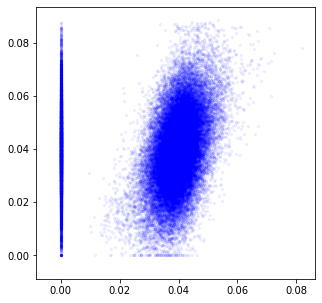

In [287]:

plt.figure(figsize=(5,5))
for i in range(0,100):
    a = predicted_auto[i]
    b = res_pca[i]
    plt.scatter(a,b,s=5,c='b',alpha=0.05)
#plt.plot(np.arange(0,2),c='r')
plt.show()

In [288]:
encoder = Model(x_in, enc)
res_auto = encoder.predict(res_pca)

uma = umap.UMAP(n_components=2)
uma = uma.fit(res_auto,labels_train)

K.N.N.  accuracy:  0.7495507246376811
D.tree. accuracy:  0.704427536231884


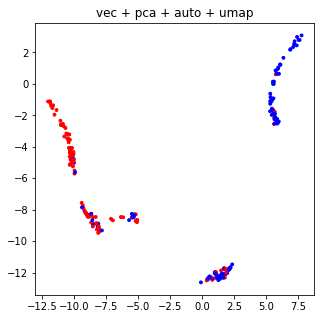

In [289]:
gr = graphs_test
lb = labels_test

test_vect = vetcoriz.transform(gr)
test_pca = pca.transform(test_vect)
test_pca = scaler.transform(test_pca)
test_pca = normalizer.transform(test_pca)
test_auto = encoder.predict(test_pca)
test_uma = uma.transform(test_auto)

eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = eva.performance_with_kfold(test_uma,lb)
print("K.N.N.  accuracy: ",np.mean(acc))

eva = Evaluator(DecisionTreeClassifier())
acc, pre, rec, f = eva.performance_with_kfold(test_uma,lb)
print("D.tree. accuracy: ",np.mean(acc))


colors = ['red','blue']
plt.figure(figsize=(5,5))
lab = labels[1:500]
xx = test_uma[:,0]
yy = test_uma[:,1]
plt.title("vec + pca + auto + umap")
plt.scatter(xx,yy,s=8,c=lb,cmap=matplotlib.colors.ListedColormap(colors))

K.N.N.  accuracy:  0.996396103896104
D.tree. accuracy:  0.9946103896103897


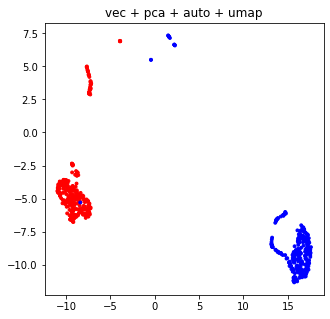

In [280]:
gr = graphs_train
lb = labels_train

test_vect = vetcoriz.transform(gr)
test_pca = pca.transform(test_vect)
test_pca = scaler.transform(test_pca)
test_pca = normalizer.transform(test_pca)
test_auto = encoder.predict(test_pca)
test_uma = uma.transform(test_auto)

eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = eva.performance_with_kfold(test_uma,lb)
print("K.N.N.  accuracy: ",np.mean(acc))

eva = Evaluator(DecisionTreeClassifier())
acc, pre, rec, f = eva.performance_with_kfold(test_uma,lb)
print("D.tree. accuracy: ",np.mean(acc))


colors = ['red','blue']
plt.figure(figsize=(5,5))
lab = labels[1:500]
xx = test_uma[:,0]
yy = test_uma[:,1]
plt.title("vec + pca + auto + umap")
plt.scatter(xx,yy,s=8,c=lb,cmap=matplotlib.colors.ListedColormap(colors))

# Risultati

K.N.N.  accuracy:  0.6842391304347826
D.tree. accuracy:  0.6258623188405796


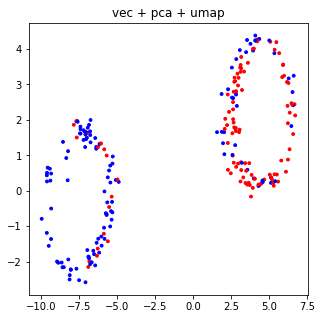

In [300]:

graphs_train, graphs_test, labels_train, labels_test = train_test_split(graphs,labels,test_size=0.3,random_state=11)

plot_vect(graphs_test,labels_test)

K.N.N.  accuracy:  0.7495507246376811
D.tree. accuracy:  0.7127608695652173


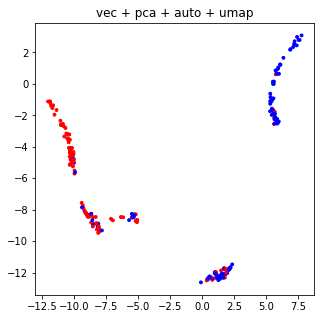

In [301]:
plot_auto_emb(gr,lb)

In [297]:
def plot_vect(gr,lb):
    vect_res = emb_5.transform(gr)
    
    eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
    acc, pre, rec, f = eva.performance_with_kfold(vect_res,lb)
    print("K.N.N.  accuracy: ",np.mean(acc))
    eva = Evaluator(DecisionTreeClassifier())
    acc, pre, rec, f = eva.performance_with_kfold(vect_res,lb)
    print("D.tree. accuracy: ",np.mean(acc))
    
    colors = ['red','blue']
    plt.figure(figsize=(5,5))
    lab = labels[1:500]
    x = vect_res[:,0]
    y = vect_res[:,1]
    plt.title("vec + pca + umap")
    plt.scatter(x,y,s=8,c=lb,cmap=matplotlib.colors.ListedColormap(colors))
    plt.show()
    
    
    
def plot_auto_emb(gr,lb):
    
    test_vect = vetcoriz.transform(gr)
    test_pca = pca.transform(test_vect)
    test_pca = scaler.transform(test_pca)
    test_pca = normalizer.transform(test_pca)
    test_auto = encoder.predict(test_pca)
    test_uma = uma.transform(test_auto)

    eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
    acc, pre, rec, f = eva.performance_with_kfold(test_uma,lb)
    print("K.N.N.  accuracy: ",np.mean(acc))

    eva = Evaluator(DecisionTreeClassifier())
    acc, pre, rec, f = eva.performance_with_kfold(test_uma,lb)
    print("D.tree. accuracy: ",np.mean(acc))


    colors = ['red','blue']
    plt.figure(figsize=(5,5))
    lab = labels[1:500]
    xx = test_uma[:,0]
    yy = test_uma[:,1]
    plt.title("vec + pca + auto + umap")
    plt.scatter(xx,yy,s=8,c=lb,cmap=matplotlib.colors.ListedColormap(colors))
    plt.show()